<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/statistical_inference_class/math_and_stats/error_control_optional_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Plot Single P Value over time**

[1] 0.03914331

The lowest p-value was observed at sample size 21 
The p-value dropped below 0.05 for the first time as sample size 21

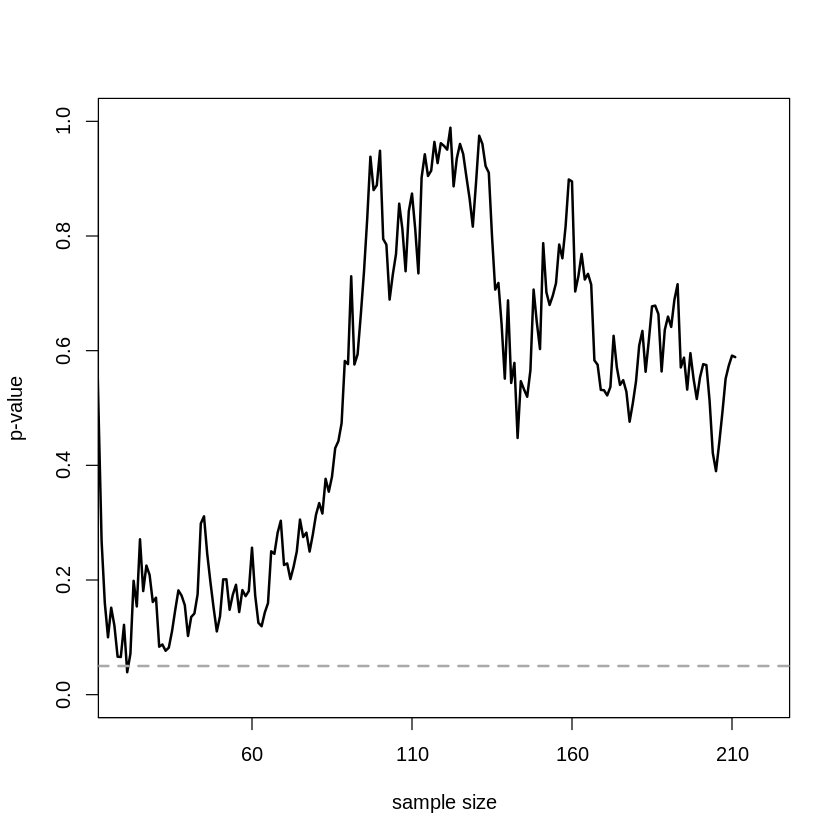

In [16]:
n<-200 #total number of datapoints (per condition) you are willing to collect after initial 10

D<-0.0 #True effect size (Keep SD below to 1, otherwise, this is just mean dif, not d)
SD<-1 #Set True standard deviation.

p<-numeric(n) #store p-values
x<-numeric(n) #store x-values
y<-numeric(n) #store y-values

n<-n+10 #script calculates p-values after 10 people in each condition, so add 10 to number of datapoints

for(i in 10:n){ #for each simulated participants after the first 10
  x[i]<-rnorm(n = 1, mean = 0, sd = SD)
  y[i]<-rnorm(n = 1, mean = D, sd = SD)
  z<-t.test(x[1:i],y[1:i], var.equal=TRUE) #perform the t-test
  p[i]<-z$p.value 
}

p<-p[10:n] #Remove first 10 empty p-values

#Create the plot
#png(file="p-value_over_time.png",width=4000,height=2000, , units = "px", res = 500)
plot(0, col="red", lty=1, lwd=3, ylim=c(0,1), xlim=c(10,n), type="l", xlab='sample size', ylab='p-value', cex.lab=1, cex.axis=1, xaxt = "n")
lines(p, lwd=2)
abline(h=0.05, col="darkgrey", lty=2, lwd=2) #draw ine at p = 0.05
axis(1, at=seq(0, n-10, by=(n-10)/4), labels = seq(10, n, by=(n-10)/4))
#dev.off()

min(p) #Return lowest p-value from all looks
cat("The lowest p-value was observed at sample size",which.min(p)+10, '\n') #Return the sample size at which the p-value was smallest
cat("The p-value dropped below 0.05 for the first time as sample size",which(p<0.05)[1]+10) #Return the sample size at which the p-value dropped below 0.05 for the first

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

**Optional Stopping Simulation**

Loop 1 of 5000 
Loop 2 of 5000 
Loop 3 of 5000 
Loop 4 of 5000 
Loop 5 of 5000 
Loop 6 of 5000 
Loop 7 of 5000 
Loop 8 of 5000 
Loop 9 of 5000 
Loop 10 of 5000 
Loop 11 of 5000 
Loop 12 of 5000 
Loop 13 of 5000 
Loop 14 of 5000 
Loop 15 of 5000 
Loop 16 of 5000 
Loop 17 of 5000 
Loop 18 of 5000 
Loop 19 of 5000 
Loop 20 of 5000 
Loop 21 of 5000 
Loop 22 of 5000 
Loop 23 of 5000 
Loop 24 of 5000 
Loop 25 of 5000 
Loop 26 of 5000 
Loop 27 of 5000 
Loop 28 of 5000 
Loop 29 of 5000 
Loop 30 of 5000 
Loop 31 of 5000 
Loop 32 of 5000 
Loop 33 of 5000 
Loop 34 of 5000 
Loop 35 of 5000 
Loop 36 of 5000 
Loop 37 of 5000 
Loop 38 of 5000 
Loop 39 of 5000 
Loop 40 of 5000 
Loop 41 of 5000 
Loop 42 of 5000 
Loop 43 of 5000 
Loop 44 of 5000 
Loop 45 of 5000 
Loop 46 of 5000 
Loop 47 of 5000 
Loop 48 of 5000 
Loop 49 of 5000 
Loop 50 of 5000 
Loop 51 of 5000 
Loop 52 of 5000 
Loop 53 of 5000 
Loop 54 of 5000 
Loop 55 of 5000 
Loop 56 of 5000 
Loop 57 of 5000 
Loop 58 of 5000 
Loop 59 of 5000 
Loop 6

Streaming output truncated to the last 5000 lines.
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(matp[i, ] < alpha)):
“no non-

Type 1 error rates for look 1 to 5 : 0.0526 0.0492 0.0514 0.0486 0.0478Type 1 error rate when only the lowest p-value for all looks is reported: 0.146

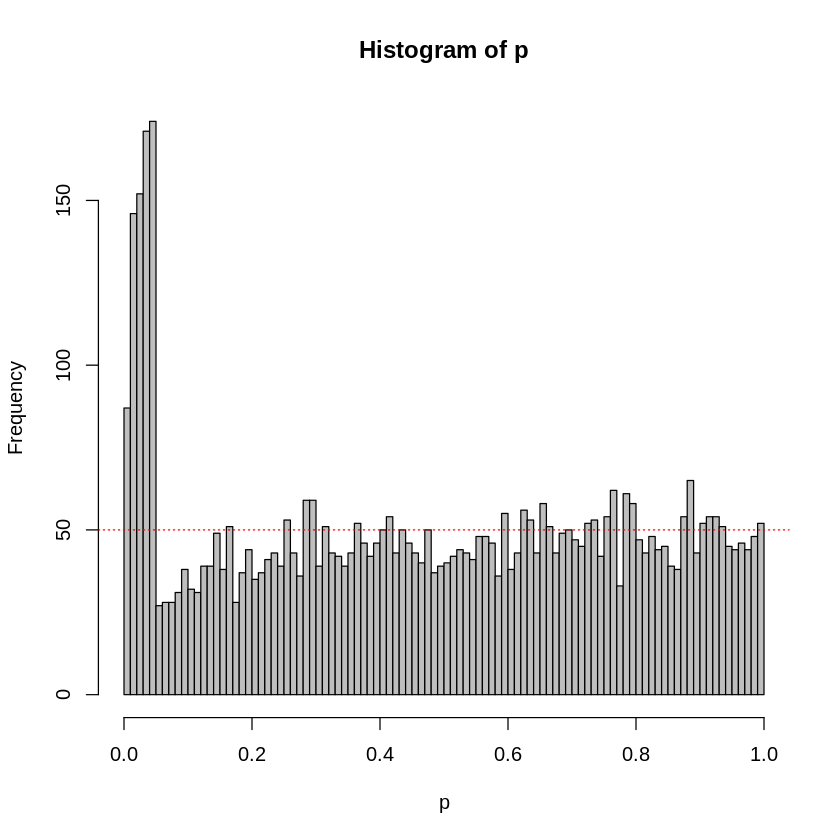

In [17]:
# WARNING THIS TAKES A LONG TIME
N<-100 #total number of datapoints (per condition) you are willing to collect
Looks<-5 #set number of looks at the data
nSim<-5000 #number of simulated studies
alpha<-0.05 #set alpha

D<-0 #True effect size (must be 0 when simulating Type 1 errors)

#Take care of some settings
options(scipen=100, digits=4) #disable scientific notation for numbers
LookN<-ceiling(seq(0,N,N/Looks)) #Determine at which N's to look
LookN<-LookN[-1] #remove look at 0
LookN<-LookN[LookN > 2] #Remove looks at N of 1 or 2 (not possible with t-test)
Looks<-length(LookN) #if looks are removed, change number of looks
matp<-matrix(NA, nrow=nSim, ncol=Looks) #Matrix for p-values at sequential tests
SigSeq<-numeric(Looks) #Variable to store final p-values
OptStop<-numeric(nSim) #variable to store positions of optional stopping
p<-numeric(nSim) #Variable to save optional stopping p-values

#Loop data generation for each study, then loop to perform a test for each N 
for (i in 1:nSim){
  x<-rnorm(n = N, mean = 0, sd = 1)
  y<-rnorm(n = N, mean = D, sd = 1)
  for (j in 1:Looks){
  matp[i,j]<-t.test(x[1:LookN[j]],y[1:LookN[j]], var.equal=TRUE)$p.value #perform the t-test, store
  }
  cat('Loop', i, 'of', nSim,'\n')
}

#Save Type 1 error rate for each look
for (i in 1:Looks){
  SigSeq[i] <- sum(matp[,i]<alpha)
}

#Get the positions at which are stopped, and then these p-values
for (i in 1:nSim){
  OptStop[i] <- min(which(matp[i,]<alpha))
}

OptStop[is.infinite(OptStop)] <- Looks #If nothing significant, take last p-value (fixes error warning)
for (i in 1:nSim){
  p[i] <- matp[i,OptStop[i]]
}

breaks<-100
hist(p, breaks=breaks,col="grey")
abline(h=nSim/breaks, col = "red", lty=3)

#Return Type 1 error rates for each look, and the the Type 1 error rate when only reporting the lowest p-value over all looks
cat("Type 1 error rates for look 1 to", Looks,":", SigSeq/nSim, '\n')
cat("Type 1 error rate when only the lowest p-value for all looks is reported:", sum(p<alpha)/nSim)

#© Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/